In [1]:
from model.pa_module import PA_module
from mmdet.datasets.pipelines import Normalize
import torch
from PIL import Image
import numpy as np
from mmcv.runner import load_checkpoint
import matplotlib.pyplot as plt

In [3]:
pa = PA_module()
model_parameter = 'GGN/PA.pth'
load_checkpoint(pa,model_parameter)

In [ ]:
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True
)
n = Normalize(**img_norm_cfg)

In [7]:
img_file = '/home/zh21/data/YouTube/valid/JPEGImages/0062f687f1/00005.jpg'
img = Image.open(img_file).__array__()
input_tensor = torch.from_numpy(n({'img':img})['img'])
input_tensor = input_tensor.swapaxes(0,2).unsqueeze(0)

In [ ]:
output = pa(input_tensor)

In [56]:
out_img = output[0].detach().numpy().swapaxes(0,2).squeeze()
out_img.shape

(180, 320)

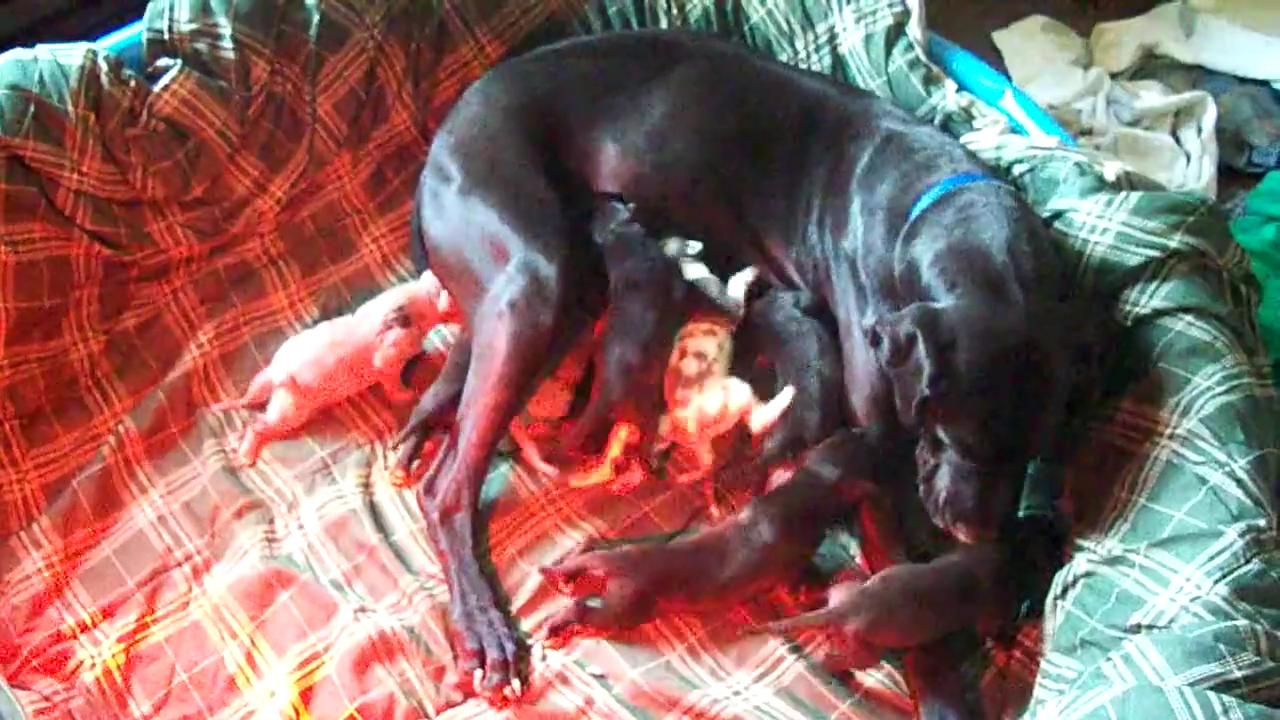

In [64]:
Image.open(img_file)

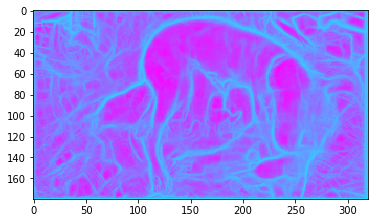

In [63]:
plt.imshow(out_img, cmap='cool', interpolation='nearest')
plt.show()